In [1]:
import sys
import os
# Get the absolute path to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
# Add it to sys.path
sys.path.append(project_root)

In [2]:
from bimpcc.dataset import get_blur_dataset
from bimpcc.models.tvreconstruction_model import TVReconstructionMPCC
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
import scipy.sparse as sp
import numpy as np


In [3]:
def plot_experiment(true,noisy,u, alpha):
    
    fig,ax = plt.subplots(1,3,figsize=(14,4))
    ax[0].imshow(true,cmap='gray')
    ax[0].set_title('True Image')
    ax[0].axis('off')
    ax[1].imshow(noisy,cmap='gray')
    ax[1].set_title('Noisy Image\nPSNR: {:.4f}'.format(psnr(true,noisy)))
    ax[1].axis('off')
    ax[2].imshow(u,cmap='gray')
    ax[2].set_title(f'Reconstructed Image\nPSNR: {psnr(true,u):.4f}\n alpha = {alpha}')
    # ax[2].set_xlabel('alpha = {}'.format(alpha))
    ax[2].axis('off')

    plt.show()

In [21]:
scale = 40

In [22]:
dataset = get_blur_dataset("cameraman",scale=scale)
true, blurred = dataset.get_training_data()

(np.float64(-0.5), np.float64(39.5), np.float64(39.5), np.float64(-0.5))

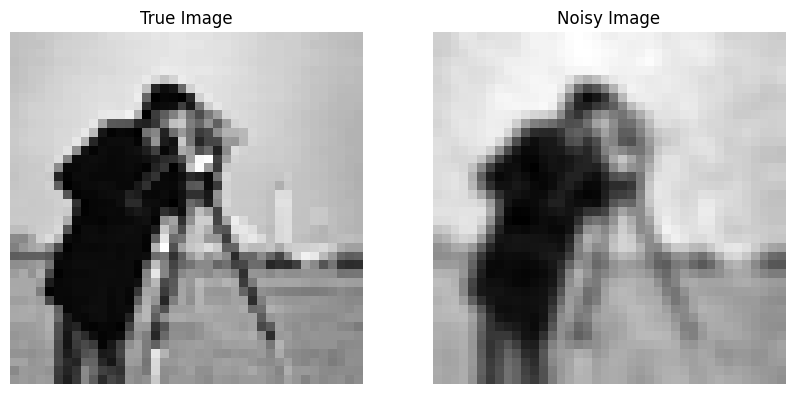

In [23]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(true,cmap='gray')
ax[0].set_title('True Image')
ax[0].axis('off')
ax[1].imshow(blurred,cmap='gray')
ax[1].set_title('Noisy Image')
ax[1].axis('off')

In [24]:
from bimpcc.utils import gaussian_blur_sparse_matrix_symmetric
forward_map = gaussian_blur_sparse_matrix_symmetric(true.shape)
model = TVReconstructionMPCC(forward_map,true,blurred,epsilon=1e-3,t_init=1.0)

In [25]:
res,x_opt,fun_opt = model.solve(max_iter=20,t_min=1e-9,tol=1e-2,print_level=0,verbose=True, nlp_max_iter=5000, nlp_tol=1e-6)

Iter   Termination_status            Objective      MPCC_compl               t

0                 0  3.859410244853318       7.815701167411961                  1.0

1                 0  3.863569387589696       5.672030892553158                  0.5

2                 0  3.8289703541251323      3.7871512955397146                0.25

3                 0  3.888171116463797       2.204253026168786                0.125

4                 0  3.9359278058116134      1.5960703582101101              0.0625

5                 0  3.96881728789943        0.9301967414942136             0.03125

6                 0  4.049012163548831       0.5369225587015622            0.015625

7                 0  4.144544757908265       0.310716833141025            0.0078125

8                 0  4.240916847172009       0.18123165834150384         0.00390625

9                 0  4.300978244192578       0.09693410808885379        0.001953125

10                 0  4.361059127752409       0.05655474790201512       0.0009765625

11                 0  4.405410179877907       0.03393850094088502      0.00048828125

12                 0  4.45141676988006        0.024348293050303452    0.000244140625

13                 0  4.504604359475743       0.021436262878696613    0.0001220703125

14                 0  4.648650113684717       0.030880826316679565    6.103515625e-05

15                 0  4.917682573585424       0.04808403232452367     3.0517578125e-05

16                -1  5.08534743028092        0.041300250388267644    1.52587890625e-05

17                -1  5.071016142830872       0.043226412457831584    1.678466796875e-05

18                -1  5.054990047680162       0.04562235440419648     1.8463134765625003e-05

19                 0  5.035580655427614       0.047897919954991756    2.0309448242187506e-05

* (STOPPED) Iteration 20: Solving the NLP problem for t = 7.402793884277347e-06 with complementarity: 
0.047897919954991756

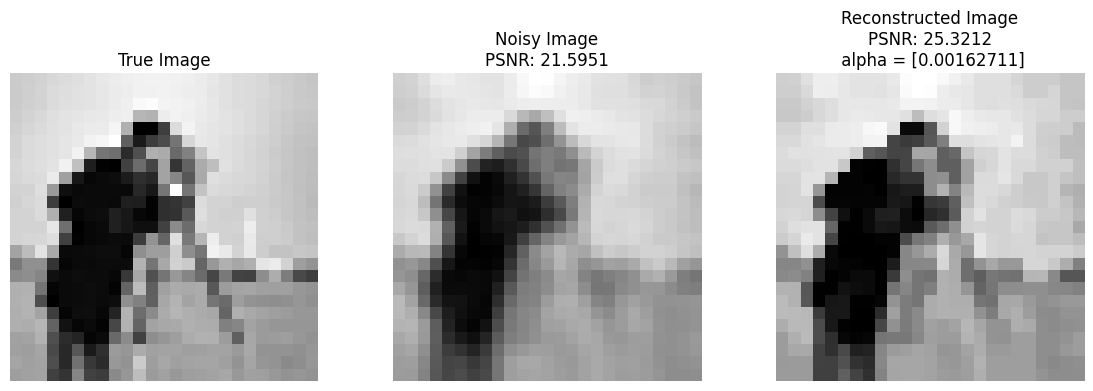

In [17]:
u, q, r, delta, theta, alpha = model.parse_vars_fn(x_opt)
u = u.reshape((scale,scale))
plot_experiment(true,blurred,u,alpha)